In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

from ccl import ccl, show_labeled_image
from block_matching import blockMatching, preprocess_image
from morphology import morphology_opening, morphology_closing
from otsu import otsu_recursive, binary_threshold, get_histogram

op = os.path.join

In [2]:
img1_dir = "./test1.png"
img2_dir = "./test2.png"

In [3]:
img1 = cv.imread(img1_dir)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = cv.imread(img2_dir)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

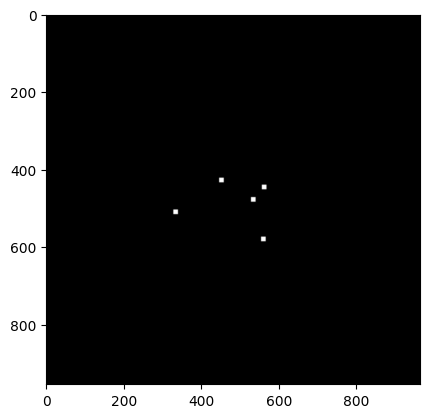

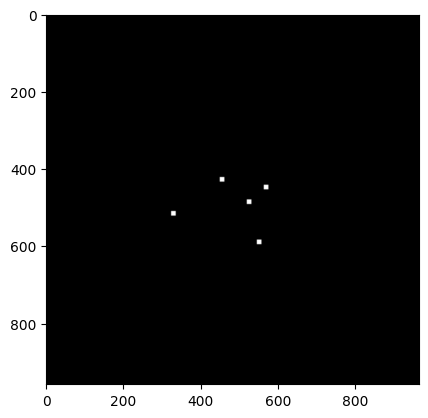

In [4]:
plt.imshow(img1, cmap='gray')
plt.show()
plt.imshow(img2, cmap='gray')
plt.show()

### **OTSU**

In [5]:
img1_hist, img2_hist = get_histogram(img1), get_histogram(img2)

In [6]:
img1_otsu_thres = otsu_recursive(img1_hist)
img2_otsu_thres = otsu_recursive(img2_hist)

/Users/hoeun/Library/CloudStorage/OneDrive-개인/2024-1학기/디지털영상처리/팀프로젝트/vision-based-flocking/otsu.py:38: RuntimeWarning: invalid value encountered in scalar divide
  mu2_new = (mu - q1_new * mu1_new) / (1 - q1_new)


In [7]:
img1_bin, img2_bin = binary_threshold(img1, img1_otsu_thres), binary_threshold(img2, img2_otsu_thres)

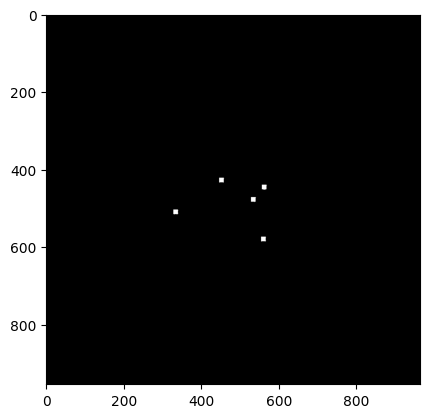

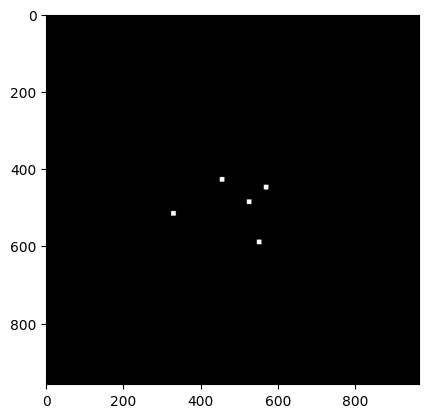

In [8]:
plt.imshow(img1_bin, cmap='gray')
plt.show()

plt.imshow(img2_bin, cmap='gray')
plt.show()

### **Morphology**

In [9]:
img1_morph = morphology_opening(img1_bin, 3)
img2_morph = morphology_opening(img2_bin, 3)

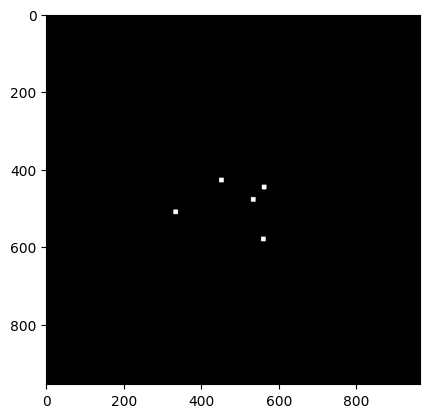

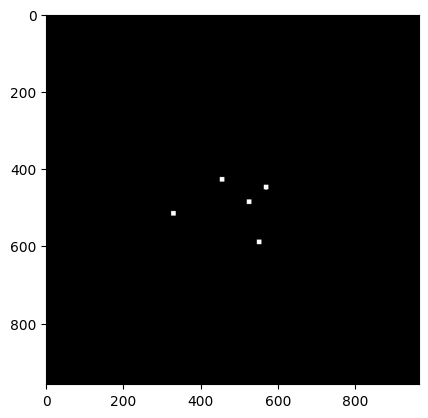

In [10]:
plt.imshow(img1_morph, cmap='gray')
plt.show()

plt.imshow(img2_morph, cmap='gray')
plt.show()

### **Connected Component Labeling**

In [11]:
img1_ccl = ccl(img1_morph)
img2_ccl = ccl(img2_morph)

In [12]:
print(img1_ccl.max(), img2_ccl.max())

5 5


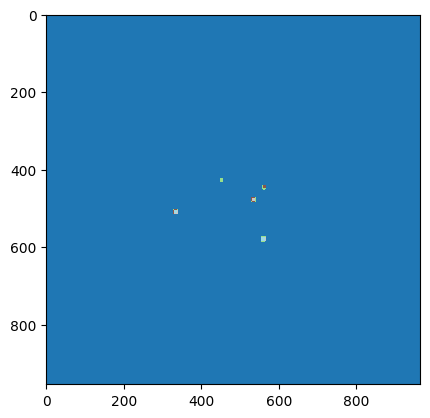

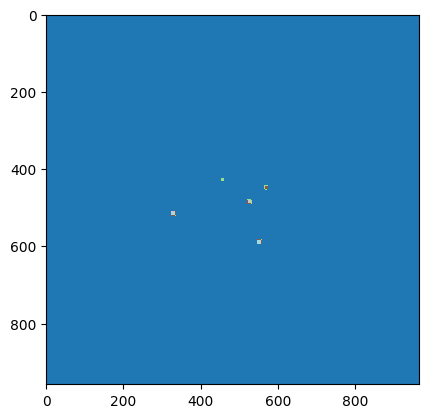

In [13]:
show_labeled_image(img1_ccl)
show_labeled_image(img2_ccl)

### **Block Matching**

In [18]:
n_component = min(img1_ccl.max(), img2_ccl.max())
motion_vector = []

for comp in range(1, n_component + 1):
    img1_comp = preprocess_image(img1_ccl, comp)
    img2_comp = preprocess_image(img2_ccl, comp)
    
    v = blockMatching(img1_comp, img2_comp)
    motion_vector.append(v)

In [19]:
print(motion_vector)

[(0, -8), (-8, -8), (-8, 8), (-8, 8), (-8, 8)]
